In [1]:
import pickle
import numpy as np
from cube_fil_finder.util import cube_moments
from cube_fil_finder.galfa import galfa_const
from cube_fil_finder.galfa import galfa_util
from cube_fil_finder.util import moments

from matplotlib import pyplot as plt

%matplotlib inline

/Users/larryli/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
reload(cube_moments)
reload(galfa_util)

<module 'cube_fil_finder.galfa.galfa_util' from '/Users/larryli/Documents/CC/16-17/research/3d_filfind/cube_fil_finder/galfa/galfa_util.pyc'>

In [3]:
ex_galfa_slice_path = '/Volumes/LarryExternal1/Research_2017/GALFA_slices_backup/umask_gaussian_30/GALFA_HI_W_S0955_V-050.4kms_umask.fits'

In [14]:
pickle_path_all_trees_1_6 = '../pickled_dicts/all_sky_1_6_cut/all_sky_1_6.p'  
all_trees = pickle.load(open(pickle_path_all_trees_1_6, 'rb'))

In [8]:
pickle_path_all_data = '../pickled_dicts/all_sky_1_6_cut/all_sky_1_6_properties_fin.p'
all_prop = pickle.load(open(pickle_path_all_data, 'rb'))

In [7]:
bad_trees = ['5216_1028_0','7901_955_0','6499_985_0','2431_1020_0','4753_990_0','2844_1029_0','3482_975_0',
 '11433_997_0','6932_974_0','18355_1014_0','1781_1023_0','5631_1028_0','5150_1038_0','10586_970_0','10760_983_0',
 '8776_1030_0','6720_1017_0','8738_1015_0','6012_1032_0','12141_1018_0','1995_1014_0','7611_956_0','5393_978_0',
 '6932_974_0','13922_1031_0','46955_1054_0','9905_1061_0','12603_1055_0','5191_1032_0']

In [20]:
for k in all_prop:
    data = all_prop[k]
    if data['width_fit'][3] > .5:
        print(k)
    

1882_1015_0


In [21]:
tree = all_trees['1882_1015_0']

tree.length

4

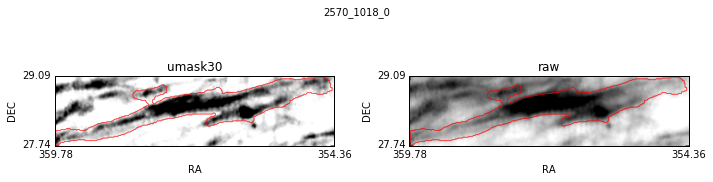

In [27]:
tree = all_trees['1882_1015_0']

tree_mask = tree.root_node.mask
tree_size = tree.root_node.masked_area_size
tree_v_span = tree.length * galfa_const.GALFA_W_SLICE_SEPARATION
tree_starting_v_index = tree.root_v_slice

x_bar, y_bar, theta_1, theta_2, tree_roundness = moments.get_tree_mask_orientation_info(tree)
tree_ra, tree_dec = galfa_util.galfa_index_to_radecs(x_bar, y_bar)
tree_l, tree_b = galfa_util.galfa_index_to_lb(x_bar, y_bar)

ra, dec = galfa_util.galfa_index_to_radecs([tree.root_node.corners[0][0], tree.root_node.corners[1][0]],
                                           [tree.root_node.corners[0][1], tree.root_node.corners[1][1]])

tree_data_cube_umask30 = galfa_util.get_galfa_data_cube_from_tree(tree, cube_type='umask30')
moment_0_map_umask30 = cube_moments.moment_0_from_cube(tree_data_cube_umask30)

tree_data_cube_raw = galfa_util.get_galfa_data_cube_from_tree(tree, cube_type='raw')
moment_0_map_raw = cube_moments.moment_0_from_cube(tree_data_cube_raw)

fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axs = [ax1, ax2]
moment_0_maps = [moment_0_map_umask30, moment_0_map_raw]

for i in range(len(axs)):
    cutoff = np.percentile(moment_0_maps[i], 5)
    cutoff2 = np.percentile(moment_0_maps[i], 95)
    axs[i].imshow(moment_0_maps[i].clip(cutoff, cutoff2), origin='lower', cmap='binary') #imshow does m by n
    axs[i].contour(tree_mask, alpha=.5, colors='red', linewidths=.3)

    axs[i].set_xticks([0, tree.root_node.corners[1][0]-tree.root_node.corners[0][0]])
    axs[i].set_xticklabels(np.round(ra,2))
    axs[i].set_yticks([0, tree.root_node.corners[1][1]-tree.root_node.corners[0][1]])
    axs[i].set_yticklabels(np.round(dec,2))
    axs[i].set_xlabel('RA')
    axs[i].set_ylabel('DEC')

    if i == 0:
        axs[i].set_title('umask30')
    elif i == 1:
        axs[i].set_title('raw')
fig.suptitle('{0}'.format(k))
fig.tight_layout()
fig.show()
